<a href="https://colab.research.google.com/github/minghoona/minghoona.github.io/blob/master/DataMining_2018035714_%EA%B9%80%EB%AA%85%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [508]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import csv
import json

In [509]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [511]:
with open("/content/drive/My Drive/넷플릭스_주가예측/json/train.json", "r", encoding="utf-8") as f:
    ddata = json.load(f) 
    df = pd.DataFrame(ddata)

In [513]:
df

,Date,Open,High,Low,Volume,Close
0,2015-12-16,120,123,118,13181000,123
1,2015-12-17,124,126,122,17284900,123
2,2015-12-18,121,122,118,17948100,118
3,2015-12-21,120,120,116,11670000,117
4,2015-12-22,117,117,115,9689000,116
...,...,...,...,...,...,...
962,2019-10-14,284,287,282,5513200,286
963,2019-10-15,284,286,279,7685600,284
964,2019-10-16,283,288,281,16175900,286
965,2019-10-17,304,309,288,38258900,293


In [514]:
print(df.isnull().sum()) # 결측치 없는지 확인

Date      0
Open      0
High      0
Low       0
Volume    0
Close     0
dtype: int64


In [516]:
print(df.describe(include="all"))

              Date        Open  ...        Volume       Close
count          967  967.000000  ...  9.670000e+02  967.000000
unique         967         NaN  ...           NaN         NaN
top     2019-09-18         NaN  ...           NaN         NaN
freq             1         NaN  ...           NaN         NaN
mean           NaN  223.923475  ...  9.886233e+06  223.827301
std            NaN  104.455030  ...  6.467710e+06  104.319356
min            NaN   81.000000  ...  1.616300e+06   83.000000
25%            NaN  124.000000  ...  5.638150e+06  124.000000
50%            NaN  194.000000  ...  8.063300e+06  194.000000
75%            NaN  329.000000  ...  1.198440e+07  327.500000
max            NaN  421.000000  ...  5.841040e+07  419.000000

[11 rows x 6 columns]


In [518]:
import datetime
datetime.datetime.today().day

25

시계열 데이터 전처리

In [519]:
from datetime import date

In [520]:
def printDayOfTheWeek (year, month, day):
    dayOfTheWeek = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
    return dayOfTheWeek[date(year, month, day).weekday()]

In [521]:
for i in range(len(df["Date"])):
  d = datetime.datetime.strptime(df["Date"][i], '%Y-%m-%d')
  #print(d.year)
  df.at[i,'Year'] = d.year
  df.at[i,'Month'] = d.month
  df.at[i,'Day'] = d.day
  df.at[i, 'Day_Of_Week'] = printDayOfTheWeek(d.year, d.month, d.day)
  df.at[i, 'Day_Of_Week_num'] = datetime.datetime.strptime(df["Date"][i], '%Y-%m-%d').weekday()

In [525]:
for i in range(len(df["Month"])):
  if df["Month"][i] >=1 and df["Month"][i] <=3:
    df.at[i, 'Quater'] = 1
  elif df["Month"][i] >=4 and df["Month"][i] <=6:
    df.at[i, 'Quater'] = 2
  elif df["Month"][i] >=7 and df["Month"][i] <=9:
    df.at[i, 'Quater'] = 3
  else :
    df.at[i, 'Quater'] = 4

In [527]:
df["Year"] = df["Year"].astype('int')
df["Month"] = df["Month"].astype('int')
df["Day"] = df["Day"].astype('int')
df["Day_Of_Week_num"] = df["Day_Of_Week_num"].astype('int')
df["Quater"] = df["Quater"].astype('int')

In [529]:
df

,Date,Open,High,Low,Volume,Close,Year,Month,Day,Day_Of_Week,Day_Of_Week_num,Quater
0,2015-12-16,120,123,118,13181000,123,2015,12,16,Wed,2,4
1,2015-12-17,124,126,122,17284900,123,2015,12,17,Thu,3,4
2,2015-12-18,121,122,118,17948100,118,2015,12,18,Fri,4,4
3,2015-12-21,120,120,116,11670000,117,2015,12,21,Mon,0,4
4,2015-12-22,117,117,115,9689000,116,2015,12,22,Tue,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
962,2019-10-14,284,287,282,5513200,286,2019,10,14,Mon,0,4
963,2019-10-15,284,286,279,7685600,284,2019,10,15,Tue,1,4
964,2019-10-16,283,288,281,16175900,286,2019,10,16,Wed,2,4
965,2019-10-17,304,309,288,38258900,293,2019,10,17,Thu,3,4


거래량의 이상치 확인

In [ ]:
from matplotlib import pyplot as plt

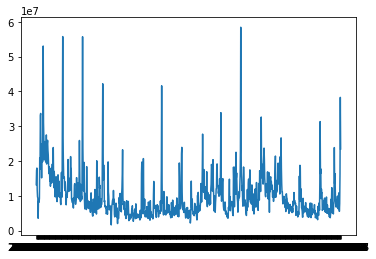

In [ ]:
plt.plot(df["Date"],df["Volume"])

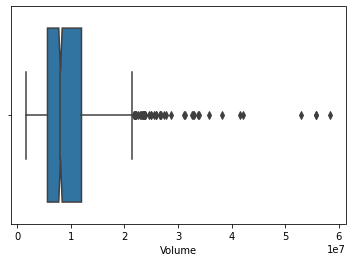

In [411]:
sns.boxplot(df['Volume'], notch= 1, sym = 'rs')
plt.show()

요일별 거래량 확인

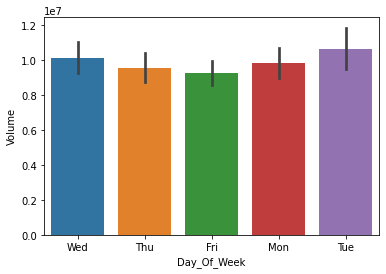

In [ ]:
sns.barplot(
    data= df,
    x= "Day_Of_Week",
    y= "Volume"
)

In [ ]:
df.groupby(['Day_Of_Week'], as_index=False).mean()


,Day_Of_Week,Open,High,Low,Volume,Close
0,Fri,224.923077,227.876923,221.441026,9.299132e+06,224.353846
1,Mon,225.307263,228.597765,221.519553,9.831907e+06,225.150838
2,Thu,223.497462,226.431472,219.822335,9.554350e+06,223.370558
3,Tue,223.461929,227.055838,220.187817,1.062873e+07,223.807107
4,Wed,222.577889,225.959799,218.783920,1.010391e+07,222.592965


요일별 거래량 이상치 확인

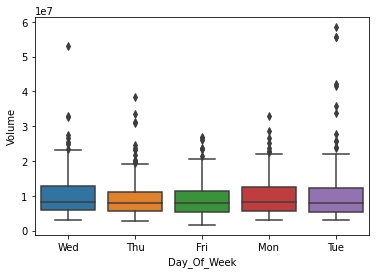

In [ ]:
sns.boxplot(x=df["Day_Of_Week"], y=df["Volume"], data=df)
plt.show()

In [ ]:
df["Volume"].describe()

count    9.670000e+02
mean     9.886233e+06
std      6.467710e+06
min      1.616300e+06
25%      5.638150e+06
50%      8.063300e+06
75%      1.198440e+07
max      5.841040e+07
Name: Volume, dtype: float64

In [ ]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Close', 'Day_Of_Week'], dtype='object')

탐색적 데이터 분석(EDA) 추가 진행

In [ ]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Close', 'Year', 'Month',
       'Day', 'Day_Of_Week', 'Day_Of_Week_num', 'Quater', 'Volume_Outlier',
       'Fri_Volume_Outlier', 'Tue_Volume_Outlier'],
      dtype='object')

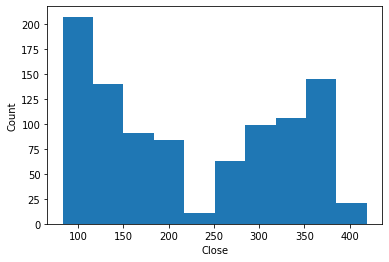

In [ ]:
ax = plt.hist(df['Close'],bins=10)
plt.xlabel("Close")
plt.ylabel("Count")
plt.show()

<function matplotlib.pyplot.show>

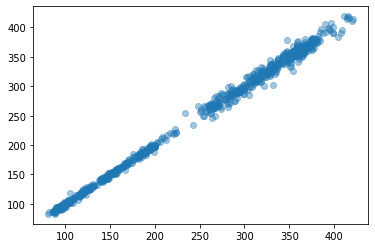

In [ ]:
plt.scatter(df[['Open']], df[['Close']], alpha=0.4)
plt.show

<function matplotlib.pyplot.show>

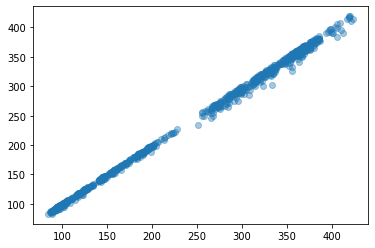

In [ ]:
plt.scatter(df[['High']], df[['Close']], alpha=0.4)
plt.show

<function matplotlib.pyplot.show>

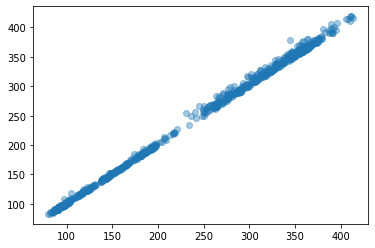

In [ ]:
plt.scatter(df[['Low']], df[['Close']], alpha=0.4)
plt.show

<function matplotlib.pyplot.show>

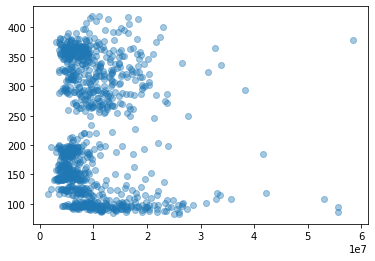

In [ ]:
plt.scatter(df[['Volume']], df[['Close']], alpha=0.4)
plt.show

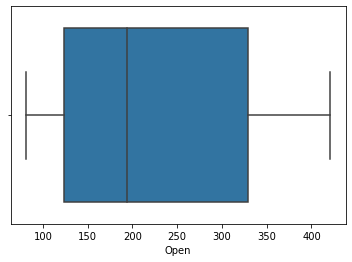

In [ ]:
sns.boxplot(df['Open'])
plt.show()

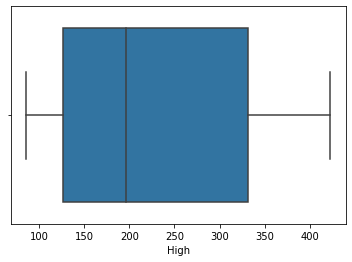

In [ ]:
sns.boxplot(df['High'])
plt.show()

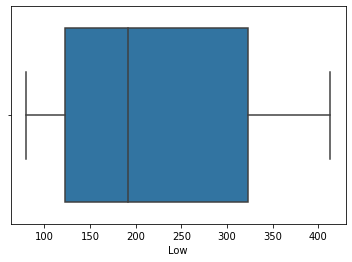

In [ ]:
sns.boxplot(df['Low'])
plt.show()

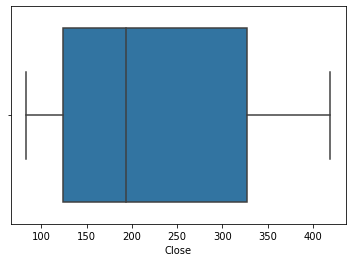

In [ ]:
sns.boxplot(df['Close'])
plt.show()

1사분위, 3사분위 값 구하는 함수 *정의*

In [412]:
def find_upper_bound(data_list):
    temp = sorted(data_list)
    q1, q3 = np.percentile(temp, [25, 75])
    iqr = q3 - q1
    upper_bound = q3 + (1.5 * iqr)
    return upper_bound

def find_lower_bound(data_list):
    temp = sorted(data_list)
    q1, q3 = np.percentile(temp, [25, 75])
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    return lower_bound

거래량의 이상치 구하기

In [413]:
upper_bound = find_upper_bound(df["Volume"])
lower_bound = find_lower_bound(df["Volume"])

거래량의 이상치 구해서 이상값의 참, 거짓 여부를 저장하는 파생변수 생성

In [414]:
for i in range(len(df["Volume"])):
  if df["Volume"][i] > upper_bound:
    df.at[i, 'Volume_Outlier'] = True
  else :
    df.at[i, 'Volume_Outlier'] = False

df["Volume_Outlier"] = df["Volume_Outlier"].astype('bool')

요일별 거래량 이상치를 구하고 파생변수를 생성

In [416]:
Fri_df = df[df["Day_Of_Week"]=="Fri"]

In [417]:
Fri_upper_bound = find_upper_bound(Fri_df["Volume"])

In [418]:
Fri_upper_bound

20752150.0

In [419]:
type(Fri_upper_bound)

numpy.float64

In [420]:
for i in range(len(df["Volume"])) :
  if(df["Day_Of_Week"][i]== "Fri" and df["Volume"][i] > Fri_upper_bound) :
     df.at[i, 'Fri_Volume_Outlier'] = True
  else :
    df.at[i, 'Fri_Volume_Outlier'] = False

df["Fri_Volume_Outlier"] = df["Fri_Volume_Outlier"].astype('bool')

In [421]:
set(df["Day_Of_Week"])

{'Fri', 'Mon', 'Thu', 'Tue', 'Wed'}

In [422]:
Tue_df = df[df["Day_Of_Week"]=="Tue"]
Tue_upper_bound = find_upper_bound(Tue_df["Volume"])
for i in range(len(df["Volume"])) :
  if(df["Day_Of_Week"][i]== "Tue" and df["Volume"][i] > Tue_upper_bound) :
     df.at[i, 'Tue_Volume_Outlier'] = True
  else :
    df.at[i, 'Tue_Volume_Outlier'] = False

df["Tue_Volume_Outlier"] = df["Tue_Volume_Outlier"].astype('bool')

In [423]:
Mon_df = df[df["Day_Of_Week"]=="Mon"]
Mon_upper_bound = find_upper_bound(Mon_df["Volume"])
for i in range(len(df["Volume"])) :
  if(df["Day_Of_Week"][i]== "Mon" and df["Volume"][i] > Mon_upper_bound) :
     df.at[i, 'Mon_Volume_Outlier'] = True
  else :
    df.at[i, 'Mon_Volume_Outlier'] = False

df["Mon_Volume_Outlier"] = df["Mon_Volume_Outlier"].astype('bool')

In [424]:
Wed_df = df[df["Day_Of_Week"]=="Wed"]
Wed_upper_bound = find_upper_bound(Wed_df["Volume"])
for i in range(len(df["Volume"])) :
  if(df["Day_Of_Week"][i]== "Wed" and df["Volume"][i] > Wed_upper_bound) :
     df.at[i, 'Wed_Volume_Outlier'] = True
  else :
    df.at[i, 'Wed_Volume_Outlier'] = False

df["Wed_Volume_Outlier"] = df["Wed_Volume_Outlier"].astype('bool')

In [425]:
Thu_df = df[df["Day_Of_Week"]=="Thu"]
Thu_upper_bound = find_upper_bound(Wed_df["Volume"])
for i in range(len(df["Volume"])) :
  if(df["Day_Of_Week"][i]== "Thu" and df["Volume"][i] > Thu_upper_bound) :
     df.at[i, 'Thu_Volume_Outlier'] = True
  else :
    df.at[i, 'Thu_Volume_Outlier'] = False

df["Thu_Volume_Outlier"] = df["Thu_Volume_Outlier"].astype('bool')

상관분석 진행

In [426]:
correlation_matrix = df.drop(["Date","Close"], axis = 1).corr()

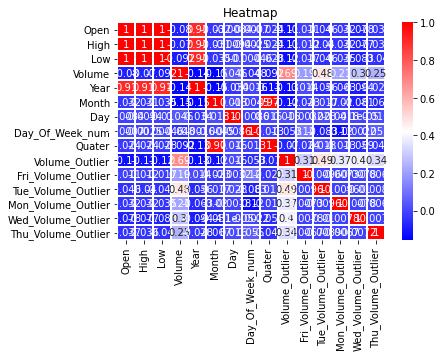

In [427]:
sns.heatmap(data=correlation_matrix, annot = True, linewidths = 1, cmap = "bwr")
plt.title("Heatmap")
plt.show()

In [440]:
df.keys()

Index(['Date', 'Open', 'High', 'Low', 'Volume', 'Close', 'Year', 'Month',
       'Day', 'Day_Of_Week', 'Day_Of_Week_num', 'Quater', 'Volume_Outlier',
       'Fri_Volume_Outlier', 'Tue_Volume_Outlier', 'Mon_Volume_Outlier',
       'Wed_Volume_Outlier', 'Thu_Volume_Outlier'],
      dtype='object')

다중 선형회귀분석 진행

In [441]:
lm = LinearRegression()
X = df[["Open", "High", "Low", "Volume", "Year", "Month", "Day", "Day_Of_Week_num", "Quater", "Volume_Outlier",'Fri_Volume_Outlier', 'Tue_Volume_Outlier', 'Mon_Volume_Outlier', 'Wed_Volume_Outlier', 'Thu_Volume_Outlier']]
Y = df["Close"]
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [442]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state= 13)
Yhat = lm.predict(X)
print("회기분석 추정 계수 :{0}[{1}] ".format(lm.coef_, lm.intercept_))

회기분석 추정 계수 :[-6.24952646e-01  8.42371956e-01  7.80242848e-01  2.44479799e-08
  2.38598590e-01 -2.94204238e-02 -1.60482856e-02 -2.54222671e-02
  3.80279420e-02 -2.78783215e-01 -1.04171517e+00 -6.02303985e-01
 -2.48374892e-02  1.52493002e+00 -9.47888769e-01][-480.65364892063263] 


In [443]:
lm.fit(X_train, Y_train)

Y_train_predict = lm.predict(X_train)
mse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
print("mean squared error : ", mse)

mean squared error :  2.087977140794682


In [444]:
r2 = r2_score(Y_train, Y_train_predict)
print("R2 : {}".format(r2))
print("R2 : {}".format(lm.score(X_train, Y_train)))

R2 : 0.9996006358498293
R2 : 0.9996006358498293


In [445]:
Y_predict = lm.predict(X_test)
mse = (np.sqrt(mean_squared_error(Y_test, Y_predict)))
print("Test data 에서 예측 후 mean squared error : ", mse)

Test data 에서 예측 후 mean squared error :  2.3622080263657845


많은 변수 중에서 최적의 변수를 선택하기 위해 최적변수 선택법인 후진제거법(Backward Elimination)으로 변수 제거 진행

In [447]:
X = df[["Open", "High", "Low", "Volume", "Year", "Month", "Day", "Day_Of_Week_num", "Quater", "Volume_Outlier",'Fri_Volume_Outlier', 'Tue_Volume_Outlier', 'Mon_Volume_Outlier', 'Wed_Volume_Outlier', 'Thu_Volume_Outlier']]
Y = df["Close"]

X_opt = [0,1,2,6,7,8,13]
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

In [448]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [452]:
import statsmodels.api as sm
X_opt = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.163
Method:                 Least Squares   F-statistic:                              9.762
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    4.28e-21
Time:                        10:20:22   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9268.
Df Residuals:                     661   BIC:                                      9336.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [453]:
X_opt = [0,1,2,3,4,5,6,7,8,9,10,11,12,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.164
Method:                 Least Squares   F-statistic:                              10.48
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    1.29e-21
Time:                        10:20:39   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9266.
Df Residuals:                     662   BIC:                                      9329.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [454]:
X_opt = [0,1,2,3,5,6,7,8,9,10,11,12,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.165
Method:                 Least Squares   F-statistic:                              11.30
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    3.74e-22
Time:                        10:21:14   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9264.
Df Residuals:                     663   BIC:                                      9323.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [455]:
X_opt = [0,1,2,5,6,7,8,9,10,11,12,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.167
Method:                 Least Squares   F-statistic:                              12.26
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    1.04e-22
Time:                        10:21:34   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9262.
Df Residuals:                     664   BIC:                                      9316.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [456]:
X_opt = [0,1,2,5,6,7,8,9,11,12,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.168
Method:                 Least Squares   F-statistic:                              13.39
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    2.75e-23
Time:                        10:23:21   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9260.
Df Residuals:                     665   BIC:                                      9310.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [457]:
X_opt = [0,1,2,5,6,7,8,9,12,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.169
Method:                 Least Squares   F-statistic:                              14.75
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    6.93e-24
Time:                        10:23:49   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9258.
Df Residuals:                     666   BIC:                                      9303.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [458]:
X_opt = [0,1,2,6,7,8,9,12,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.170
Method:                 Least Squares   F-statistic:                              16.42
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    1.65e-24
Time:                        10:24:08   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9256.
Df Residuals:                     667   BIC:                                      9297.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [459]:
X_opt = [0,1,2,6,7,8,9,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.172
Method:                 Least Squares   F-statistic:                              18.50
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    3.69e-25
Time:                        10:24:33   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9254.
Df Residuals:                     668   BIC:                                      9290.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [461]:
X_opt = [0,1,2,6,7,8,13]
regressor = sm.OLS(Y_train, X_train[:,X_opt]).fit()
print(regressor.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   0.181
Model:                            OLS   Adj. R-squared (uncentered):              0.173
Method:                 Least Squares   F-statistic:                              21.17
Date:                Thu, 25 Jun 2020   Prob (F-statistic):                    7.69e-26
Time:                        10:25:08   Log-Likelihood:                         -4619.1
No. Observations:                 676   AIC:                                      9252.
Df Residuals:                     669   BIC:                                      9284.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

정확도와 오차행렬을 출력하기 위한 함수 선언

In [470]:
from sklearn.metrics import confusion_matrix, accuracy_score

def get_clf_eval(y_test, pred) :
  acc = accuracy_score(y_test, pred)
  confusion = confusion_matrix(y_test, pred)

  print('정확도:', acc)
  print('=> 오차행렬')
  print(confusion)
  print('==========')

최적 변수 선택을 통해 만든 회귀식을 이용하여 모델 학습 진행

In [473]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)
#X_opt = [0,1,2,6,7,8,13]
features = ["Open", "High", "Low", "Month", "Day", "Day_Of_Week_num","Thu_Volume_Outlier"]
X = df[features]
Y = df["Close"]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Image
import pydotplus
import os

In [475]:
X = df[["Open", "High", "Low", "Month", "Day", "Day_Of_Week_num","Thu_Volume_Outlier"]]
Y = df["Close"]

In [474]:
X = np.array(pd.DataFrame(df, columns=["Open", "High", "Low", "Month", "Day", "Day_Of_Week_num","Thu_Volume_Outlier"]))
Y = np.array(pd.DataFrame(df, columns=['Close']))

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.35, random_state=12)

np.unique(y_test, return_counts=True)

(array([ 83,  86,  87,  88,  90,  91,  92,  94,  95,  96,  97,  98,  99,
        100, 101, 102, 103, 104, 105, 107, 108, 110, 114, 115, 117, 118,
        119, 122, 123, 125, 126, 127, 129, 131, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 153, 154, 155, 156, 157,
        158, 159, 160, 161, 162, 163, 165, 166, 167, 168, 169, 171, 175,
        176, 179, 181, 182, 183, 184, 185, 187, 188, 189, 190, 192, 193,
        195, 196, 199, 200, 205, 209, 210, 212, 220, 222, 234, 249, 250,
        254, 258, 259, 261, 263, 265, 267, 268, 270, 271, 275, 276, 279,
        280, 286, 287, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298,
        299, 300, 302, 306, 312, 313, 314, 315, 316, 318, 320, 321, 322,
        325, 326, 327, 328, 330, 333, 335, 336, 337, 338, 340, 341, 343,
        345, 346, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 359,
        360, 361, 362, 363, 364, 365, 367, 368, 369, 370, 372, 373, 375,
        377, 380, 381, 382, 390, 391, 398, 419]),
 

의사결정나무 모델에 최적 변수를 이용하여 학습 후 실행

In [480]:
stock_tree = DecisionTreeClassifier(max_depth = 10, random_state=12)
stock_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=12, splitter='best')

In [478]:
from graphviz import Source
from sklearn.tree import export_graphviz

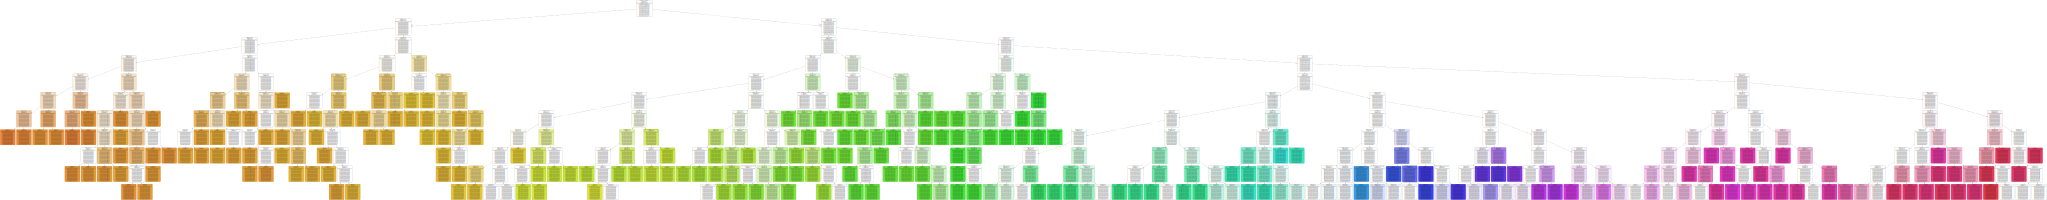

In [481]:
Source(export_graphviz(stock_tree, feature_names=["Open", "High", "Low", "Month", "Day", "Day_Of_Week_num","Thu_Volume_Outlier"], class_names=None, rounded=True, filled=True))

의사결정나무 모델 정확도 측정

In [482]:
from sklearn.metrics import accuracy_score

In [483]:
y_pred_tr = stock_tree.predict(X_train)
accuracy_score(y_train, y_pred_tr)

0.6719745222929936

In [484]:
y_pred_tr = stock_tree.predict(X_test)
accuracy_score(y_test, y_pred_tr)

0.17404129793510326

In [486]:
X = df[["Open", "High", "Low", "Month", "Day", "Day_Of_Week_num","Thu_Volume_Outlier"]]
Y = df['Close']

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.35)

In [488]:
from sklearn.datasets import make_moons

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import mglearn

렌덤포레스트 기법을 이용한 학습 진행 후 정확도 출력

In [489]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [491]:
# 학습 진행
forest = RandomForestClassifier(n_estimators=10)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state= 10)
features = ["Open","High","Low","Day_Of_Week_num","Quater", "Volume_Outlier","Fri_Volume_Outlier","Tue_Volume_Outlier"]
X = df[features]
Y = df["Close"]

forest.fit(X_train, Y_train)

# 예측
y_pred = forest.predict(X_test)
print(y_pred)
print(list(y_test))
 


[199 143 123 169 367 167 307  97 297 312  95 365 400 194 102 184 324  98
 182 143 380 303 368  92  97 195 333 181 140  97 325 189 361 104 127 351
  94 144 365  99 320 339 137 268 195 346 228 169 294 315 419 195 326 320
 329 156 144 184 331 360  96 356 142 352 187 144  92  91 123 146 196 336
 290 106 393 299  98 376 104 279  90 311 286 358 268  99 153 366 357 118
 115  97 367 354 118 320 352 143 181 368  89  94 359  92  96 139 123 368
  98 320 143 326 101 356 128 144 351 258 313  91 380 141 364 181 357 196
 284  96 163 175 374 192 365 131 304 117 157 361  93 261 175 123 125 325
  99 196 280  94  86  94 392 286 157 304  98 297 338  94  94 139 195 159
 317 158 346 290 142 184 195 196  96 108 360 292 321 181 275 104 326 271
 167 352 348 369 256 294  95 301 357 371 286 333  96 320 338  99 144  96
 179 353  97 380 143 179 213 123 199  91 140  98 338 286 177  96  93 354
 343 114 184 114 124  94 123 153 357 143 101 141 184 143  91 268 117 339
 317 166 348 126 157 298 363 365 153 416 377  86  9

In [492]:
# 정확도 확인
print('정확도 :', metrics.accuracy_score(Y_test, y_pred))

정확도 : 0.140893470790378


인공신경망 기법을 이용한 학습 진행 후 정확도 출력

In [538]:
from sklearn.neural_network import MLPClassifier
ANN = MLPClassifier(solver='lbfgs', alpha=1, hidden_layer_sizes=(10,5), random_state=1)
ANN.fit(X_train, Y_train)
Y_pred_ANN = ANN.predict(X_test)
acc_ANN = round(ANN.score(X_train, Y_train) * 100, 2)
acc_ANN

2.07

나이브 베이즈 분류 기법을 이용한 학습 진행 후 정확도 출력

In [495]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_NB = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train)*100, 2)
acc_gaussian

63.17

KNN 기법을 이용한 학습 진행 후 정확도 출력

In [496]:
from sklearn.neighbors import KNeighborsClassifier
knn  = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train)*100,2)
acc_knn

48.82

SVM 기법을 이용한 학습 진행 후 정확도 출력

In [497]:
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [498]:
Y_pred_svc = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

6.66